In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [10]:
portfolio = pd.read_json('dataset/portfolio.json', orient='records', lines=True)
profile = pd.read_json('dataset/profile.json', orient='records', lines=True)
transcript = pd.read_json('dataset/transcript.json', orient='records', lines=True)

# Exploratory Data Analysis and Data Cleaning

## Portfolio dataset

In [11]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [12]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Text(0, 0.5, 'Count')

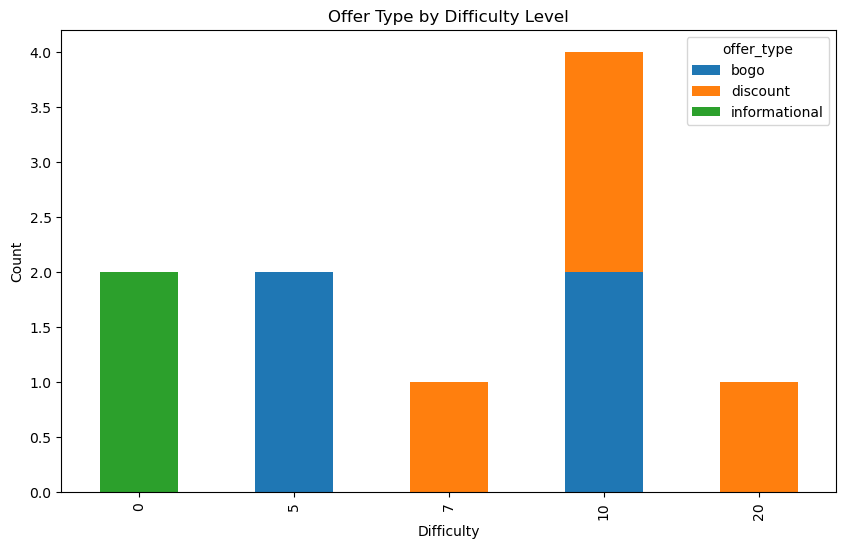

In [13]:
grouped = portfolio.groupby(['difficulty', 'offer_type']).size().unstack()

# Create a bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Offer Type by Difficulty Level')
ax.set_xlabel('Difficulty')
ax.set_ylabel('Count')

In [14]:
portfolio.groupby('difficulty').agg({
    'reward': ['min', 'max', 'mean', 'count'],
    'duration': ['min', 'max', 'mean'],
    'offer_type': lambda x: x.mode().iloc[0]
})

reward                duration                offer_type
              min max mean count      min max   mean       <lambda>
difficulty                                                         
0               0   0  0.0     2        3   4   3.50  informational
5               5   5  5.0     2        5   7   6.00           bogo
7               3   3  3.0     1        7   7   7.00       discount
10              2  10  6.0     4        5  10   7.25           bogo
20              5   5  5.0     1       10  10  10.00       discount

**insights**:
- there're no null values
- `channels` written in the list format
- there're 4 promotional channels
- there're 10 unique offers with 2 informational, 6 bogo, and 2 discount
- difficulty 0 offers are all informational and do not have any reward
- difficulty 5 offers are all bogo and have reward amounts of 5, with durations ranging from 5 to 7 days
- difficulty 7 offers are all discount and have reward amounts of 5, with the duration of 7 days
- difficulty 10 offers are all bogo and have reward amounts ranging from 2 to 10, with durations ranging from 5 to 10 days
- difficulty 20 offers are all discount with a reward amount of 5 and a duration of 10 days- there're no null values
- comparing reward per hour across different offer types (BOGO, discount, informational) can reveal which types of offers are most effective at driving customer engagement and sales. this can inform decisions about which offers to include in future marketing campaigns and how to tailor offers to different customer segments.

**to-do:**
- change `id` to `offer_id`
- extract `channels`
- one hote encode `channels`
- change `duration` from day to hour
- create `reward_per_hour` column
- one hot encode `offer_type`
- reorder columns

In [15]:
portfolio_mod = portfolio.copy()

In [16]:
portfolio_mod.rename(columns={'id': 'offer_id'}, inplace=True)

In [17]:
channels = portfolio_mod['channels'].str.join(sep='*').str.get_dummies(sep='*')
offer_types = pd.get_dummies(portfolio_mod['offer_type'])
portfolio_mod['duration'] = portfolio_mod['duration'] * 24
portfolio_mod['reward_per_hour'] = portfolio_mod['reward'] / portfolio_mod['duration']

In [18]:
portfolio_mod = pd.concat([portfolio_mod, channels, offer_types], axis=1)

In [19]:
portfolio_mod.columns

Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type',
       'offer_id', 'reward_per_hour', 'email', 'mobile', 'social', 'web',
       'bogo', 'discount', 'informational'],
      dtype='object')

In [20]:
portfolio_mod.drop(['channels', 'offer_type'], axis=1, inplace=True)

In [21]:
portfolio_mod = portfolio_mod[['offer_id','difficulty', 'duration', 'reward_per_hour', 'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational']]
portfolio_mod

,offer_id,difficulty,duration,reward_per_hour,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,168,0.059524,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,120,0.083333,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,96,0.000000,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,168,0.029762,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,240,0.020833,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,0.017857,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,240,0.008333,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,72,0.000000,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,120,0.041667,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,168,0.011905,1,1,0,1,0,1,0


## Profile dataset

In [22]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [23]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [24]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [25]:
profile.gender.unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [26]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa0399745b0>,
 [Text(-0.24762902922809168, 1.0717648360921126, 'M'),
  Text(0.19924591390285712, -1.0818045413997002, 'F'),
  Text(1.098890122095961, -0.049401412529646305, 'O')],
 [Text(-0.1350703795789591, 0.5845990015047886, '57.2%'),
  Text(0.10867958940155842, -0.5900752043998364, '41.3%'),
  Text(0.5993946120523422, -0.026946225016170708, '1.4%')])

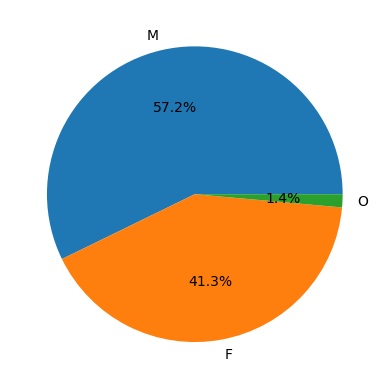

In [27]:
gender_count = profile['gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')

Text(0.5, 1.0, 'Age distribution')

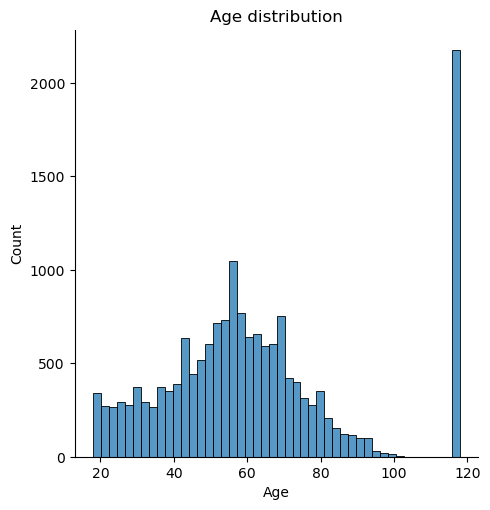

In [28]:
sns.displot(profile, x='age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution')

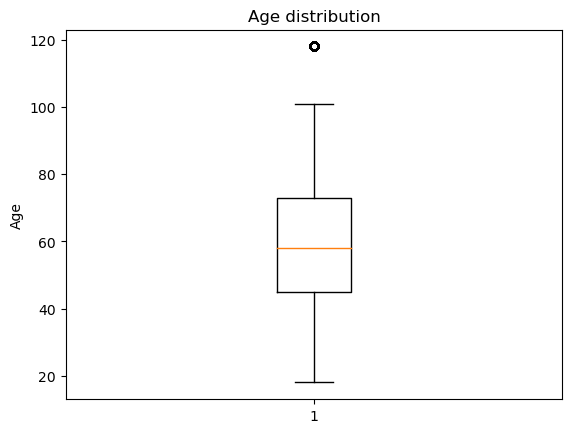

In [29]:
plt.boxplot(profile['age'])
plt.ylabel('Age')
plt.title('Age distribution')

<AxesSubplot: xlabel='gender', ylabel='age'>

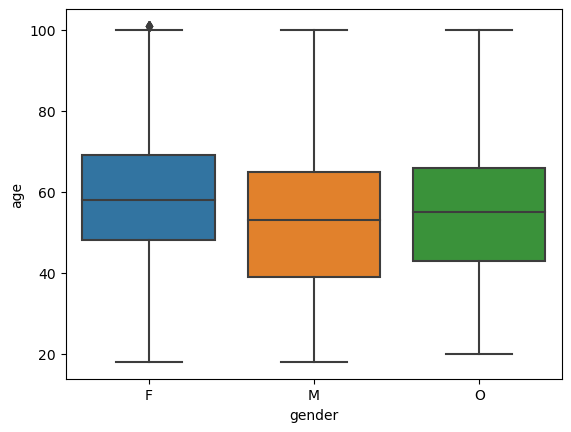

In [30]:
sns.boxplot(x='gender', y='age', data=profile)

In [31]:
mask = profile.isna().any(axis=1)
null_rows = profile[mask]
null_rows.describe()

,age,became_member_on,income
count,2175.0,2.175000e+03,0.0
mean,118.0,2.016804e+07,NaN
std,0.0,1.009105e+04,NaN
min,118.0,2.013080e+07,NaN
25%,118.0,2.016070e+07,NaN
50%,118.0,2.017073e+07,NaN
75%,118.0,2.017123e+07,NaN
max,118.0,2.018073e+07,NaN


In [32]:
null_rows.gender.unique()

array([None], dtype=object)

In [33]:
profile.duplicated().sum()

0

In [34]:
age_stats = profile.groupby('gender')['age'].agg(['mean', 'median', lambda x: x.mode()[0], 'std']).reset_index()
age_stats.rename(columns={'<lambda_0>': 'mode'})

,gender,mean,median,mode,std
0,F,57.544950,58.0,58,16.883315
1,M,52.116690,53.0,58,17.413894
2,O,54.400943,55.0,49,16.244710


a simple age categorization

- Children: under 18 years old
- Young adults: 18-24 years old
- Adults: 25-64 years old
- Seniors: 65 years old and above

In [35]:
bins = [0, 18, 24, 64, 120]
labels = ['Children', 'Young adults', 'Adults', 'Seniors']
age_category = pd.cut(profile['age'], bins=bins, labels=labels, right=False)
age_counts = pd.Series(age_category).value_counts()
age_counts

Adults          9511
Seniors         6752
Young adults     737
Children           0
Name: age, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

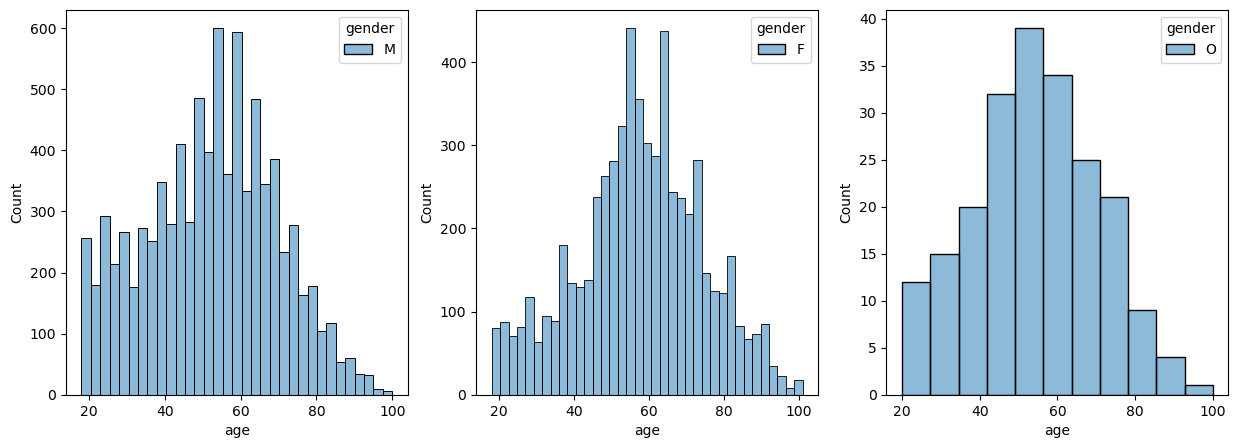

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=profile[profile['gender'] == 'M'], x='age', hue='gender', kde=False, ax=axes[0])
sns.histplot(data=profile[profile['gender'] == 'F'], x='age', hue='gender', kde=False, ax=axes[1])
sns.histplot(data=profile[profile['gender'] == 'O'], x='age', hue='gender', kde=False, ax=axes[2])

Text(0.5, 1.0, 'Income distribution')

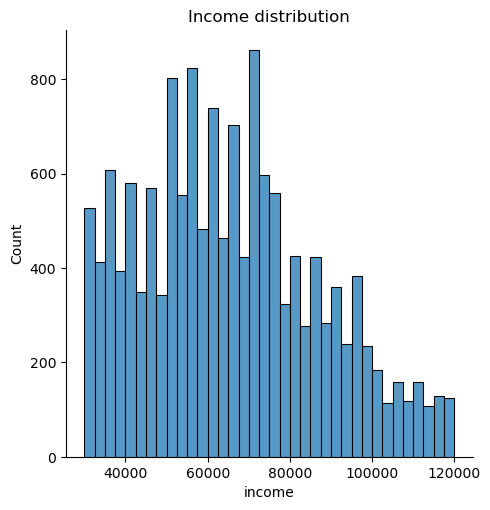

In [38]:
sns.displot(profile, x='income')
plt.title('Income distribution')

<AxesSubplot: xlabel='income', ylabel='Count'>

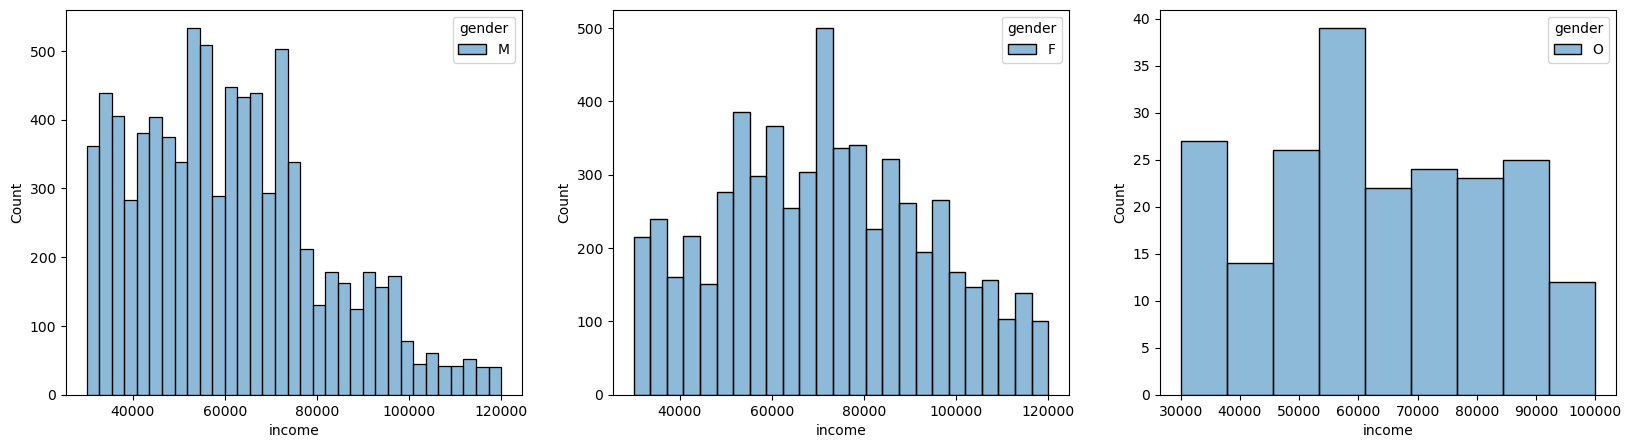

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data=profile[profile['gender'] == 'M'], x='income', hue='gender', kde=False, ax=axes[0])
sns.histplot(data=profile[profile['gender'] == 'F'], x='income', hue='gender', kde=False, ax=axes[1])
sns.histplot(data=profile[profile['gender'] == 'O'], x='income', hue='gender', kde=False, ax=axes[2])

In [40]:
income_by_gender = profile.groupby('gender')['income'].mean()
income_by_gender

gender
F    71306.412139
M    61194.601603
O    63287.735849
Name: income, dtype: float64

In [41]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


**insights**:
- there are some outliers in the age column, with some users having ages of 118 years. These outliers may need to be removed or handled in some way before performing further analysis.
- there are some missing values in the gender, income, and age columns. Null values are present in 2175 rows.
- the gender distribution is skewed towards males, with 8484 males, 6129 females, and 2121 other/unknown genders.
- from the age distribution that the majority of customers in the dataset are adults, followed by young adults, seniors, and children. This suggests that the dataset primarily represents adult customers, which is not surprising given that the dataset is focused on customers of a coffee shop chain.
- the distribution of income is positively skewed, meaning that there are relatively more customers with lower incomes (**males**) and fewer customers with higher incomes (**females**).
- `became_member_on` is in `int64` instead of `datetime` format
- the `became_member_on` column contains the date on which each user became a member of the Starbucks rewards program. can be used to calculate the length of time that a customer has been a member of the Starbucks rewards program. This can be a useful feature for predicting customer behavior, as customers who have been members for a longer time period may have different spending habits or preferences than newer members.

**to-do:**
- change `id` to `person_id`
- remove null values
- change `become_member_on` to datetime
- create `member_duration_days` based on the latest date (maximum date) because the dataset is not up to date
- reorder columns

In [42]:
profile_mod = profile.copy()

In [43]:
profile_mod.rename(columns={'id': 'person_id'}, inplace=True)

In [44]:
profile_mod.dropna(inplace=True)

In [45]:
profile_mod['became_member_on'] = pd.to_datetime(profile_mod['became_member_on'], format='%Y%m%d')

In [46]:
from datetime import datetime

max_date = profile_mod['became_member_on'].max()

# Calculate the total membership duration in days
membership_duration = (max_date - profile_mod['became_member_on'])

# Create a new column for member_duration_days
profile_mod['member_duration_days'] = membership_duration.dt.days

In [47]:
profile_mod.columns

Index(['gender', 'age', 'person_id', 'became_member_on', 'income',
       'member_duration_days'],
      dtype='object')

In [48]:
profile_mod = profile_mod[['person_id', 'gender', 'age', 'became_member_on', 'income', 'member_duration_days']]

In [49]:
profile_mod.head()

,person_id,gender,age,became_member_on,income,member_duration_days
1,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,376
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,443
5,e2127556f4f64592b11af22de27a7932,M,68,2018-04-26,70000.0,91
8,389bc3fa690240e798340f5a15918d5c,M,65,2018-02-09,53000.0,167
12,2eeac8d8feae4a8cad5a6af0499a211d,M,58,2017-11-11,51000.0,257


## Transcript Dataset

In [50]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [51]:
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


In [52]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [53]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [54]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [55]:
transcript[transcript.event == 'offer received'].head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [56]:
transcript[transcript.event == 'offer viewed'].head()

,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0


In [57]:
transcript[transcript.event == 'offer completed'].head()

,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


**insights**:
- `value` written in the dictionary format
- there're no null values
- there're 4 kinds of event
    - transaction: a customer made a purchase, regardless of whether an offer was involved
    - offer received: a customer received an offera customer received an offer
    - offer viewed: a customer viewed an offer that was previously received
    - offer completed: a customer completed an offer after viewing it
- most of customer made a transaction

**to-do**:
- change `person` to `person_id`
- extract `offer id` and `amount` from `value` column
- remove `value` column

In [58]:
transcript_mod = transcript.copy()

In [59]:
transcript_mod.rename(columns={'person': 'person_id'}, inplace=True)

In [60]:
transcript_mod['offer_id'] = transcript_mod['value'].apply(lambda x: x['offer id'] if list(x.keys())[0] == 'offer id' else x['offer_id'] if list(x.keys())[0] == 'offer_id' else 0)

In [61]:
transcript_mod['amount_spent'] = transcript_mod['value'].apply(lambda x: x['amount'] if list(x.keys())[0] == 'amount' else 0)

In [62]:
transcript_mod.drop(columns=['value'], inplace=True)

In [63]:
transcript_mod.head()

,person_id,event,time,offer_id,amount_spent
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0


In [64]:
transcript_mod.tail()

,person_id,event,time,offer_id,amount_spent
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,3.53
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,714,0,4.05


([<matplotlib.patches.Wedge at 0x7fa045d86620>,
 [Text(0.1607925537491071, 1.0881846142354894, 'transaction'),
  Text(-0.9714225590847284, -0.5160796563528516, 'offer received'),
  Text(0.31549684071996675, -1.0537844862663903, 'offer viewed'),
  Text(1.0355014599237367, -0.3711289890264706, 'offer completed')],
 [Text(0.08770502931769476, 0.5935552441284486, '45.3%'),
  Text(-0.5298668504098518, -0.28149799437428263, '24.9%'),
  Text(0.17208918584725458, -0.5747915379634855, '18.8%'),
  Text(0.56481897814022, -0.20243399401443848, '11.0%')])

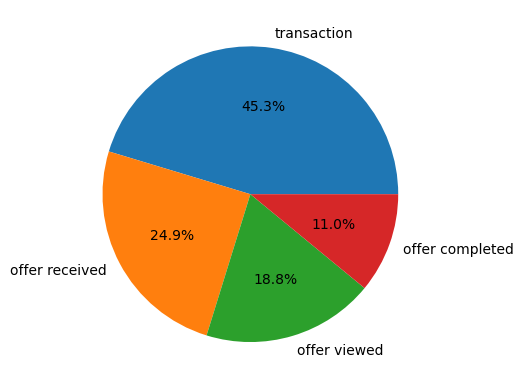

In [65]:
event_count = transcript_mod.event.value_counts()
plt.pie(event_count, labels=event_count.index, autopct='%1.1f%%')

## Merge dataset

In [66]:
len(profile_mod.person_id.unique())

14825

In [67]:
len(transcript_mod.person_id.unique())

17000

In [68]:
# merge only person listed in profile.json
transcript_profile = transcript_mod.merge(profile_mod, on='person_id')

In [69]:
# keep `transaction` while merging
full_dataset = transcript_profile.merge(portfolio_mod, on='offer_id', how='left')

In [70]:
full_dataset.head()

,person_id,event,time,offer_id,amount_spent,gender,age,became_member_on,income,member_duration_days,difficulty,duration,reward_per_hour,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,F,75,2017-05-09,100000.0,443,5.0,168.0,0.029762,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,F,75,2017-05-09,100000.0,443,5.0,168.0,0.029762,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,19.89,F,75,2017-05-09,100000.0,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,F,75,2017-05-09,100000.0,443,5.0,168.0,0.029762,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,17.78,F,75,2017-05-09,100000.0,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
full_dataset.shape

(272762, 20)

In [72]:
full_dataset.isna().sum()

person_id                    0
event                        0
time                         0
offer_id                     0
amount_spent                 0
gender                       0
age                          0
became_member_on             0
income                       0
member_duration_days         0
difficulty              123957
duration                123957
reward_per_hour         123957
email                   123957
mobile                  123957
social                  123957
web                     123957
bogo                    123957
discount                123957
informational           123957
dtype: int64

In [73]:
# fill transaction null values with 0
full_dataset.fillna(0, inplace=True)

In [74]:
full_dataset.isna().sum()

person_id               0
event                   0
time                    0
offer_id                0
amount_spent            0
gender                  0
age                     0
became_member_on        0
income                  0
member_duration_days    0
difficulty              0
duration                0
reward_per_hour         0
email                   0
mobile                  0
social                  0
web                     0
bogo                    0
discount                0
informational           0
dtype: int64

In [75]:
full_dataset.to_csv('full_dataset.csv', index=False)

In [102]:
full_dataset_mod = full_dataset.copy()

In [103]:
genders = pd.get_dummies(full_dataset_mod['gender'], prefix='gender_')

In [104]:
full_dataset_mod = pd.concat([full_dataset_mod, genders], axis=1).head()

In [105]:
full_dataset_mod = full_dataset_mod[(full_dataset_mod.event == 'transaction') | (full_dataset_mod.event == 'offer_completed')]

In [106]:
full_dataset_mod['buy_with_offer'] = full_dataset_mod['event'].apply(lambda x: 1 if x == 'offer completed' else 0)

In [107]:
full_dataset_mod.drop(columns=['event', 'gender', 'person_id', 'offer_id', 'became_member_on'], inplace=True)

In [108]:
full_dataset_mod.columns = full_dataset_mod.columns.str.lower()

In [109]:
full_dataset_mod.head()

,time,amount_spent,age,income,member_duration_days,difficulty,duration,reward_per_hour,email,mobile,social,web,bogo,discount,informational,gender__f,gender__m,gender__o,buy_with_offer
2,132,19.89,75,100000.0,443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,144,17.78,75,100000.0,443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [ ]:
full_dataset.to_csv('full_dataset.csv', index=False)

## Full dataset

In [ ]:
full_dataset = pd.read_csv('full_dataset.csv')

in this project i will focus on offer completed and transaction

In [ ]:
offer_data = full_dataset.copy()
offer_data = offer_data[offer_data.event != 'transaction']

In [ ]:
offer_data.head()

In [ ]:
ax = sns.countplot(x='event', data=offer_data)
ax.set_title("Numbers of Offer Type")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.2, p.get_height() + 1.5))

In [ ]:
channels_data = offer_data.loc[:, ['email', 'mobile', 'social', 'web']].sum().reset_index().rename(columns={'index': 'channel', 0: 'count'})

ax = sns.barplot(x='channel', y='count', data=channels_data)

# set the plot title and axis labels
plt.title('Count of Offers by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.2, p.get_height() + 1.5))

In [ ]:
# Create a subplot figure with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

pallete = sns.set_palette('pastel')

# Plot for 'offer received'
offer_received = offer_data[offer_data.event == 'offer received'].iloc[:, -3:].sum().reset_index().rename(columns={'index': 'offer_type', 0: 'total'})

sns.barplot(x='offer_type', y='total', data=offer_received, ax=axs[0, 0])
axs[0, 0].set_title('Total Offer Received')
axs[0, 0].set_xlabel('Offer Type')
axs[0, 0].set_ylabel('Total')

for p in axs[0, 0].patches:
    axs[0, 0].annotate(str(int(p.get_height())), (p.get_x() + 0.2, p.get_height() + 1.5))

axs[0, 1].pie(offer_received['total'], labels=offer_received['offer_type'], autopct='%1.1f%%', colors=pallete)
axs[0, 1].set_title('Offer Received Percentage')

# Plot for 'offer viewed'
offer_viewed = offer_data[offer_data.event == 'offer viewed'].iloc[:, -3:].sum().reset_index().rename(columns={'index': 'offer_type', 0: 'total'})

sns.barplot(x='offer_type', y='total', data=offer_viewed, ax=axs[1, 0])
axs[1, 0].set_title('Total Offer Viewed')
axs[1, 0].set_xlabel('Offer Type')
axs[1, 0].set_ylabel('Total')

for p in axs[1, 0].patches:
    axs[1, 0].annotate(str(int(p.get_height())), (p.get_x() + 0.2, p.get_height() + 1.5))

axs[1, 1].pie(offer_viewed['total'], labels=offer_viewed['offer_type'], autopct='%1.1f%%')
axs[1, 1].set_title('Offer Viewed Percentage')

# Plot for 'offer completed'
offer_completed = offer_data[offer_data.event == 'offer completed'].iloc[:, -3:].sum().reset_index().rename(columns={'index': 'offer_type', 0: 'total'})

sns.barplot(x='offer_type', y='total', data=offer_completed, ax=axs[2, 0])
axs[2, 0].set_title('Total Offer Completed')
axs[2, 0].set_xlabel('Offer Type')
axs[2, 0].set_ylabel('Total')

for p in axs[2, 0].patches:
    axs[2, 0].annotate(str(int(p.get_height())), (p.get_x() + 0.2, p.get_height() + 1.5))
    
axs[2, 1].pie(offer_completed['total'], labels=offer_completed['offer_type'], autopct='%1.1f%%')
axs[2, 1].set_title('Offer Completed Percentage')

plt.tight_layout()

In [ ]:
# Filter the data by event type
offers_received = offer_data[offer_data['event'] == 'offer received']
offers_viewed = offer_data[offer_data['event'] == 'offer viewed']
offers_completed = offer_data[offer_data['event'] == 'offer completed']

# Set the pastel color palette
sns.set_palette('pastel')

# Create subplots for offers received
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Plot for offers received by gender
sns.countplot(x='gender', data=offers_received, ax=axs[0, 0])
for p in axs[0, 0].patches:
    axs[0, 0].annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1.5))
axs[0, 0].set_title('Offers Received by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# Plot for number of offers received by age group
sns.kdeplot(data=offers_received, x='age', hue='gender', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Number of Offers Received by Age')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Density')

# Plot for number of offers received by income
sns.kdeplot(data=offers_received, x='income', hue='gender', fill=True, ax=axs[0, 2])
axs[0, 2].set_title('Number of Offers Received by Income')
axs[0, 2].set_xlabel('Income')
axs[0, 2].set_ylabel('Density')

# Plot for offers viewed by gender
sns.countplot(x='gender', data=offers_viewed, ax=axs[1, 0])
for p in axs[1, 0].patches:
    axs[1, 0].annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1.5))
axs[1, 0].set_title('Offers Viewed by Gender')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Count')

# Plot for number of offers viewed by age group
sns.kdeplot(data=offers_viewed, x='age', hue='gender', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Number of Offers Viewed by Age')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Density')

# Plot for number of offers viewed by income
sns.kdeplot(data=offers_viewed, x='income', hue='gender', fill=True, ax=axs[1, 2])
axs[1, 2].set_title('Number of Offers Viewed by Income')
axs[1, 2].set_xlabel('Income')
axs[1, 2].set_ylabel('Density')


# Plot for offers completed by gender
sns.countplot(x='gender', data=offers_completed, ax=axs[2, 0])
for p in axs[2, 0].patches:
    axs[2, 0].annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1.5))
axs[2, 0].set_title('Offers Completed by Gender')
axs[2, 0].set_xlabel('Gender')
axs[2, 0].set_ylabel('Count')

# Plot for number of offers completed by age group
sns.kdeplot(data=offers_completed, x='age', hue='gender', fill=True, ax=axs[2, 1])
axs[2, 1].set_title('Number of Offers Completed by Age')
axs[2, 1].set_xlabel('Age')
axs[2, 1].set_ylabel('Density')

# Plot for number of offers completed by income
sns.kdeplot(data=offers_completed, x='income', hue='gender', fill=True, ax=axs[2, 2])
axs[2, 2].set_title('Number of Offers Completed by Income')
axs[2, 2].set_xlabel('Income')
axs[2, 2].set_ylabel('Density')

plt.tight_layout()

In [ ]:
# Create a figure with 3 x 1 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# BOGO offers received by gender
bogo_received_gender = offer_data[(offer_data['event'] == 'offer received') & (offer_data['bogo'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=bogo_received_gender, ax=axs[0])
ax.set_title('BOGO Offers Received by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 16000)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Discount offers received by gender
discount_received_gender = offer_data[(offer_data['event'] == 'offer received') & (offer_data['discount'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=discount_received_gender, ax=axs[1])
ax.set_title('Discount Offers Received by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 16000)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Informational offers received by gender
info_received_gender = offer_data[(offer_data['event'] == 'offer received') & (offer_data['informational'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=info_received_gender, ax=axs[2])
ax.set_title('Informational Offers Received by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 16000)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Set tight layout and show the plot
plt.tight_layout()

In [ ]:
# Create a figure with 3 x 1 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# BOGO offers viewed by gender
bogo_viewed_gender = offer_data[(offer_data['event'] == 'offer viewed') & (offer_data['bogo'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=bogo_viewed_gender, ax=axs[0])
ax.set_title('BOGO Offers Viewed by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 13500)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Discount offers viewed by gender
discount_viewed_gender = offer_data[(offer_data['event'] == 'offer viewed') & (offer_data['discount'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=discount_viewed_gender, ax=axs[1])
ax.set_title('Discount Offers Viewed by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 13500)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Informational offers viewed by gender
info_viewed_gender = offer_data[(offer_data['event'] == 'offer viewed') & (offer_data['informational'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=info_viewed_gender, ax=axs[2])
ax.set_title('Informational Offers Viewed by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 13500)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Set tight layout and show the plot
plt.tight_layout()


In [ ]:
# Create a figure with 3 x 1 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# BOGO offers completed by gender
bogo_completed_gender = offer_data[(offer_data['event'] == 'offer completed') & (offer_data['bogo'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=bogo_completed_gender, ax=axs[0])
ax.set_title('BOGO Offers Completed by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 10000)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Discount offers completed by gender
discount_completed_gender = offer_data[(offer_data['event'] == 'offer completed') & (offer_data['discount'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(x='gender', y='count', data=discount_completed_gender, ax=axs[1])
ax.set_title('Discount Offers Completed by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 10000)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

# Informational offers completed by gender

info_completed_gender = offer_data[(offer_data['event'] == 'offer completed') & (offer_data['informational'] == 1)].groupby('gender').size().reset_index(name='count')
ax = sns.barplot(data=info_completed_gender, ax=axs[2])
ax.set_title('Informational Offers Completed by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_ylim(0, 9000)
    
# Set tight layout and show the plot
plt.tight_layout()

In [ ]:
transaction_completed = full_dataset.copy()
transaction_completed = transaction_completed[(transaction_completed.event == 'transaction') | (transaction_completed.event == 'offer completed')].reset_index(drop=True)

In [ ]:
ax = sns.countplot(x="event", data=transaction_completed)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 1))

In [ ]:
transactions.head()

In [ ]:
sns.boxplot(x='amount_spent', hue='gender', data=transactions, showfliers=True, linewidth=1)

In [ ]:
transactions['amount_spent_bins']

In [ ]:
# Create bins for amount spent
bins = [0, 10, 20, 30, 40, 50, np.inf]
labels = ['$0-$10', '$10-$20', '$20-$30', '$30-$40', '$40-$50', '$50+']
transactions['amount_spent_bins'] = pd.cut(transactions['amount_spent'], bins=bins, labels=labels)

plt.subplots(figsize=(5,5))

# Plot countplot for amount spent bins by gender
sns.countplot(x='amount_spent_bins', hue='gender', data=transactions)
plt.title('Amount Spent Bins by Gender')
plt.xlabel('Amount Spent Bins')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.kdeplot(x='age', hue='gender',data=transactions)

In [ ]:
# Filter the data by event type
transactions = transaction_completed[transaction_completed['event'] == 'transaction']

# Set the pastel color palette
sns.set_palette('pastel')

# Create subplots for transaction data
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Plot for number of transactions by gender
sns.countplot(x='gender', data=transactions, ax=axs[0])
for p in axs[0].patches:
    axs[0].annotate(str(int(p.get_height())), (p.get_x() + 0.1, p.get_height() + 1.5))
axs[0].set_title('Number of Transactions by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

# Plot for total amount spent by gender
sns.barplot(x='gender', y='amount_spent', data=transactions, estimator='sum', errorbar=None,  ax=axs[1])
axs[1].set_title('Total Amount Spent by Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Amount')

# Plot for total amount spent by age group
sns.kdeplot(x='age', y='amount_spent', data=transactions, estimator=sum, ax=axs[2])
axs[2].set_title('Total Amount Spent by Age')
axs[2].set_xlabel('Age Group')
axs[2].set_ylabel('Amount')

# Plot for total amount spent by income group
sns.kdeplot(x='income', y='amount_spent', data=transactions, estimator=sum, ax=axs[3])
axs[3].set_title('Total Amount Spent by Income')
axs[3].set_xlabel('Income Group')
axs[3].set_ylabel('Amount')

# Adjust the layout of the subplots
plt.tight_layout()

# Model Trainig

In [ ]:
!pip install -Uq pip
!pip install -Uq setuptools wheel
!pip install -q torch==1.13.1+cpu torchvision==0.14.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
!pip install -q autogluon 

In [ ]:
from sklearn.model_selection import train_test_split

transaction_completed['buy_with_offer'] = transaction_completed['event'].apply(lambda x: 1 if x == 'offer completed' else 0)

# Split the data into training and test sets
train, test = train_test_split(transaction_completed, test_size=0.2, random_state=42)

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

tain_data = TabularDataset(train)
predictor = TabularPredictor(
    label="buy_with_offer",
    eval_metric='f1',
    learner_kwargs={
        "ignored_columns": ['event', 'person_id', 'offer_id', 'became_member_on']
    }
)

predictor.fit(tain_data, time_limit=600, presets="best_quality")

In [ ]:
predictor.leaderboard(silent=True)

In [ ]:
test_data = TabularDataset(test)

predictor.predict(test_data)

In [ ]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
import pandas as pd
import graphviz

# Load Starbucks customer data
data = transaction_completed.drop(columns=['person_id', 'offer_id', 'became_member_on', 'event'])

# Encode categorical features as numerical values
le = preprocessing.LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

# Separate features and labels
X = data.drop(['buy_with_offer'], axis=1)
y = data['buy_with_offer']

# Train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

# Generate a visual representation of the decision tree
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns.tolist(), class_names=['transaction', 'offer completed'], filled=True, rounded=True)



In [ ]:
# Display the decision tree
graph = graphviz.Source(dot_data)
graph.view()